#### Sleep Health and Lifestyle 

In the data we are considering the following Dataset Columns:
*Person ID: An identifier for each individual.
*Gender: The gender of the person (Male/Female).
*Age: The age of the person in years.
*Occupation: The occupation or profession of the person.
*Sleep Duration (hours): The number of hours the person sleeps per day.
*Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
*Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
*Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
*BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
*Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
*Heart Rate (bpm): The resting heart rate of the person in beats per minute.
*Daily Steps: The number of steps the person takes per day.
*Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

#### Loading and preparing the data

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report


# Loading the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Display first few rows of the DataFrame
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [256]:
# sacarlo del DF y ponerlo en uno nuevo
df["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [257]:
df.columns = df.columns.str.strip()

## Checking for anomalies

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**Checking the shape of the data**

In [259]:
print(df.shape)

(374, 13)


**Checking data types**

In [260]:
print(df.dtypes)

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


**Checking for missing values**

In [261]:
print(df.isnull())

     Person ID  Gender    Age  Occupation  Sleep Duration  Quality of Sleep  \
0        False   False  False       False           False             False   
1        False   False  False       False           False             False   
2        False   False  False       False           False             False   
3        False   False  False       False           False             False   
4        False   False  False       False           False             False   
..         ...     ...    ...         ...             ...               ...   
369      False   False  False       False           False             False   
370      False   False  False       False           False             False   
371      False   False  False       False           False             False   
372      False   False  False       False           False             False   
373      False   False  False       False           False             False   

     Physical Activity Level  Stress Level  BMI Cat

**Occupation columns**

In [262]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [263]:
df["BMI Category"] = df["BMI Category"].str.replace("Normal Weight",'Normal')

In [264]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

**Columns checkup**

In [265]:
# Checking for the presence of the Gender column
if 'Gender' in df.columns:
    # Binary encoding for Gender
    df['Gender_Numerical'] = df['Gender'].map({'Female': 0, 'Male': 1})
else:
    print("Column 'Gender' not found in the DataFrame.")

# Ordinal encoding for BMI Category 
if 'BMI Category' in df.columns:
    bmi_mapping = {'Normal': 0, 'Overweight': 1, 'Obese': 2}
    df['BMI_Numerical'] = df['BMI Category'].map(bmi_mapping)
else:
    print("Column 'BMI Category' not found in the DataFrame.")

# Ordinal encoding for Sleep Disorder
if 'Sleep Disorder' in df.columns:
    sleep_disorder_mapping = {'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2}
    df['Sleep_Disorder_Numerical'] = df['Sleep Disorder'].map(sleep_disorder_mapping)
else:
    print("Column 'Sleep Disorder' not found in the DataFrame.")


# Splitting Blood Pressure into Systolic and Diastolic
if 'Blood Pressure' in df.columns:
    df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)
    df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
    df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])

# Dropping original categorical columns if they are not needed anymore
df = df.drop(columns=['Gender', 'BMI Category', 'Sleep Disorder', "Occupation", 'Blood Pressure'], errors='ignore')

# Displaying the updated DataFrame
df.head()



,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Numerical,BMI_Numerical,Sleep_Disorder_Numerical,Systolic_BP,Diastolic_BP
0,1,27,6.1,6,42,6,77,4200,1,1,NaN,126,83
1,2,28,6.2,6,60,8,75,10000,1,0,NaN,125,80
2,3,28,6.2,6,60,8,75,10000,1,0,NaN,125,80
3,4,28,5.9,4,30,8,85,3000,1,2,2.0,140,90
4,5,28,5.9,4,30,8,85,3000,1,2,2.0,140,90


In [266]:
# Display all current columns and their unique values
for col in df.select_dtypes(include='bool').columns:
    print(f"{col}: {df[col].unique()}")
    
# Check unique values in remaining categorical columns if needed
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


In [267]:
print(df.head())
print(df.describe())


   Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0          1   27             6.1                 6                       42   
1          2   28             6.2                 6                       60   
2          3   28             6.2                 6                       60   
3          4   28             5.9                 4                       30   
4          5   28             5.9                 4                       30   

   Stress Level  Heart Rate  Daily Steps  Gender_Numerical  BMI_Numerical  \
0             6          77         4200                 1              1   
1             8          75        10000                 1              0   
2             8          75        10000                 1              0   
3             8          85         3000                 1              2   
4             8          85         3000                 1              2   

   Sleep_Disorder_Numerical  Systolic_BP  Diastolic_BP  

In [268]:
# Double check for missing values
print(df.isnull().sum())


Person ID                     0
Age                           0
Sleep Duration                0
Quality of Sleep              0
Physical Activity Level       0
Stress Level                  0
Heart Rate                    0
Daily Steps                   0
Gender_Numerical              0
BMI_Numerical                 0
Sleep_Disorder_Numerical    219
Systolic_BP                   0
Diastolic_BP                  0
dtype: int64


In [269]:
# Fill NaN values with 0 for BMI_Numerical
df['BMI_Numerical'] = df['BMI_Numerical'].fillna(0).astype('int64')

# Fill NaN values with 0 for Sleep_Disorder_Numerical
df['Sleep_Disorder_Numerical'] = df['Sleep_Disorder_Numerical'].fillna(0).astype('int64')


In [270]:
# Checking again for missing values
print(df.isnull().sum())

Person ID                   0
Age                         0
Sleep Duration              0
Quality of Sleep            0
Physical Activity Level     0
Stress Level                0
Heart Rate                  0
Daily Steps                 0
Gender_Numerical            0
BMI_Numerical               0
Sleep_Disorder_Numerical    0
Systolic_BP                 0
Diastolic_BP                0
dtype: int64


In [271]:
df["Sleep Disorder"].unique

KeyError: 'Sleep Disorder'

## EDA

array([[<Axes: title={'center': 'Person ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>,
        <Axes: title={'center': 'Quality of Sleep'}>],
       [<Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Daily Steps'}>],
       [<Axes: title={'center': 'Gender_Numerical'}>,
        <Axes: title={'center': 'BMI_Numerical'}>,
        <Axes: title={'center': 'Sleep_Disorder_Numerical'}>,
        <Axes: title={'center': 'Systolic_BP'}>],
       [<Axes: title={'center': 'Diastolic_BP'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

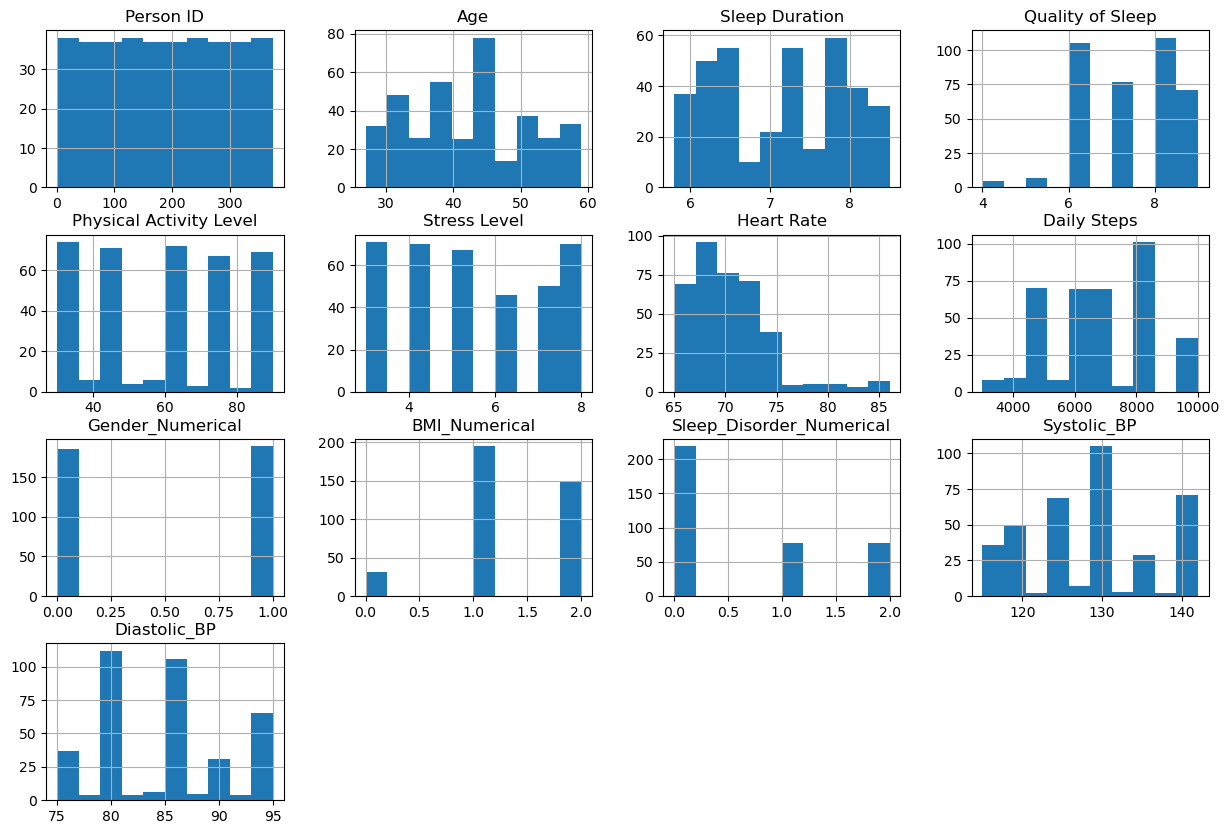

In [152]:
df.hist(bins=10, figsize=(15, 10))


<Axes: >

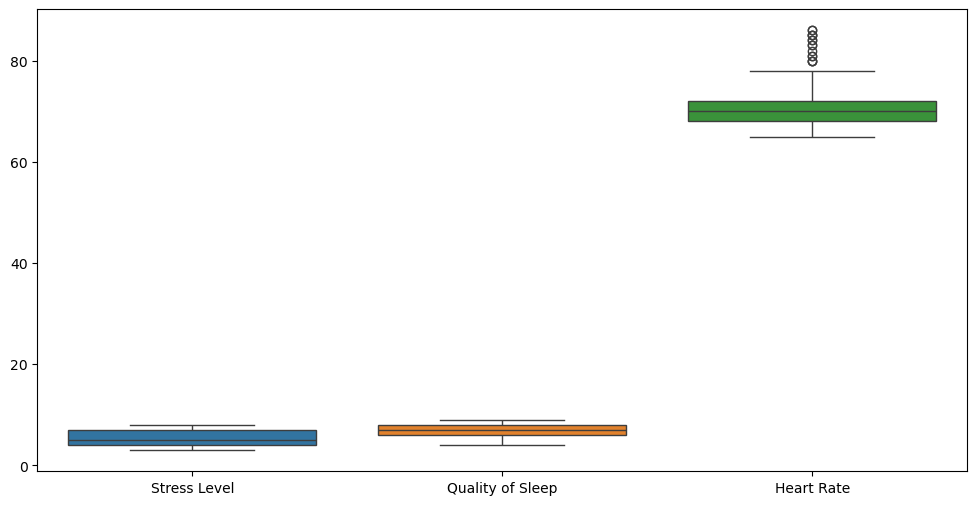

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Stress Level', 'Quality of Sleep', 'Heart Rate']])


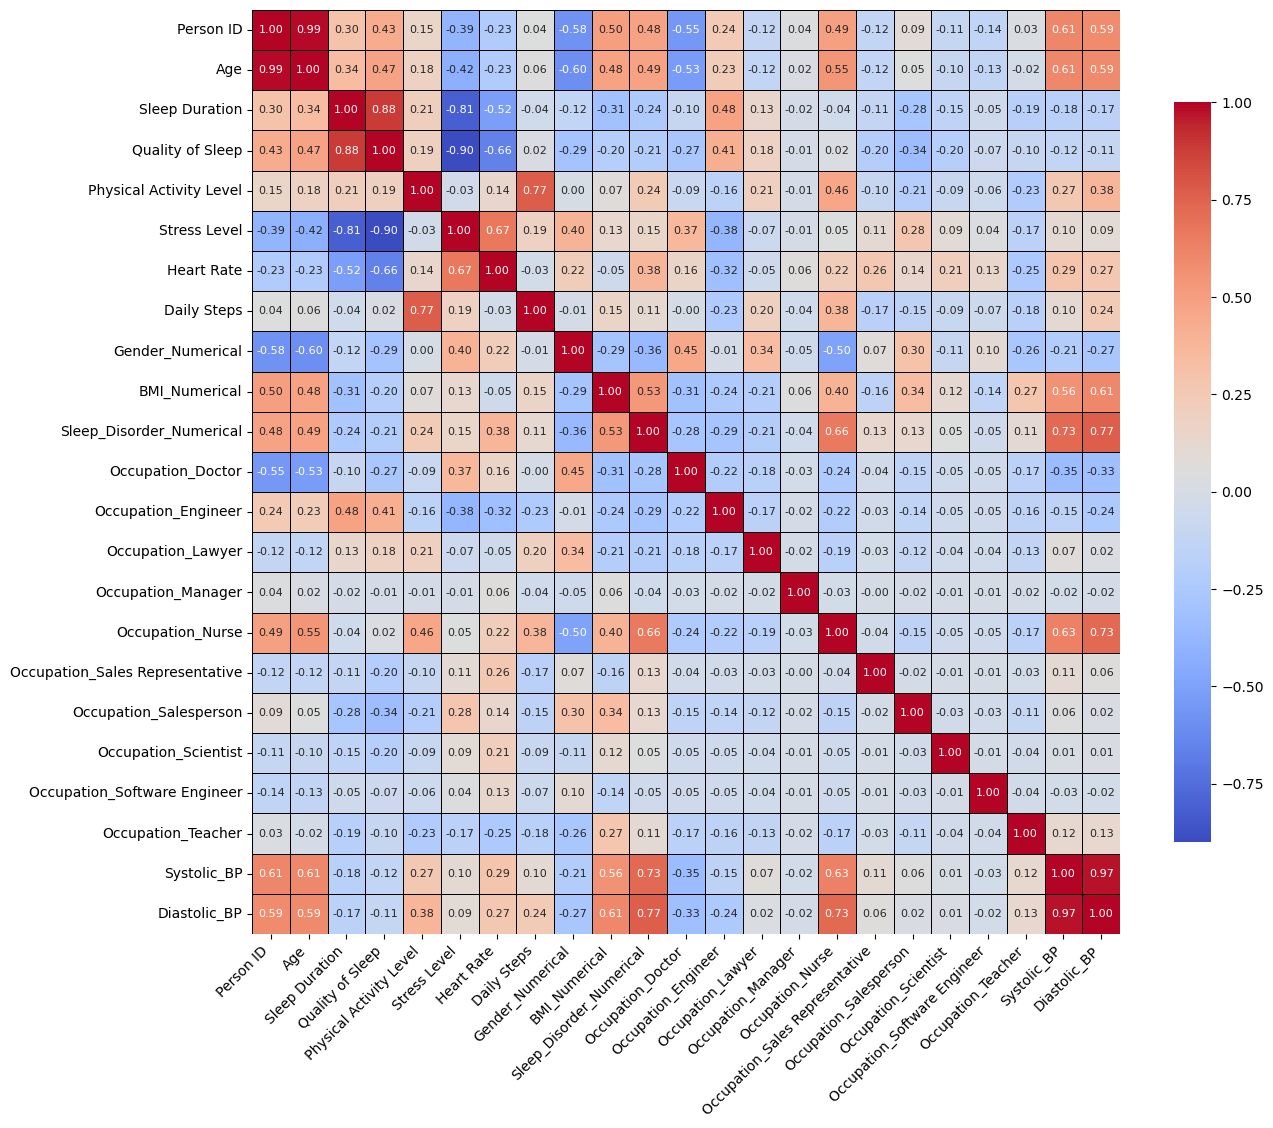

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(14, 12))

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            annot_kws={"size": 8}, cbar_kws={"shrink": .8}, 
            linewidths=.5, linecolor='black')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()



## Feature Engineering

**Normalizing Numerical Features:**

In [155]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                      'Stress Level', 'Heart Rate', 'Daily Steps', 'BMI_Numerical', 
                      'Systolic_BP', 'Diastolic_BP']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


**Creating Interaction Terms:**

In [156]:
df['Sleep_Stress_Interaction'] = df['Sleep Duration'] * df['Stress Level']

**Discretizing Continuous Variables:**

In [157]:
df['Age_binned'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])


**Dummy Encoding for Categorical Variables:**

In [158]:
df = pd.get_dummies(df, columns=['Gender_Numerical', 'Sleep_Disorder_Numerical'], drop_first=True)


**Create Aggregate Features:**

In [159]:
df['Average_Sleep_Quality'] = df[['Sleep Duration', 'Quality of Sleep']].mean(axis=1)
df['Total_Physical_Activity'] = df['Daily Steps'] + df['Physical Activity Level']


**Lag Features:**

In [160]:
df['Lagged_Sleep_Duration'] = df['Sleep Duration'].shift(1)
df['Lagged_Stress_Level'] = df['Stress Level'].shift(1)


**Polynomial Features:**

In [161]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[numerical_features])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features))
df = pd.concat([df, poly_df], axis=1)

**Remove Unnecessary Features:**

In [162]:
df.drop(['Age_binned', 'Sleep_Stress_Interaction'], axis=1, inplace=True)  # Drop as necessary


**Defining your features and target:**

In [163]:
# Define features and target
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Gradient Boosting Regressor:**

In [172]:
print(y_train.shape)

(299,)


In [174]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# Select top features based on importance
importances = gbr.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(10)['Feature']
top_features_df = df[top_features]


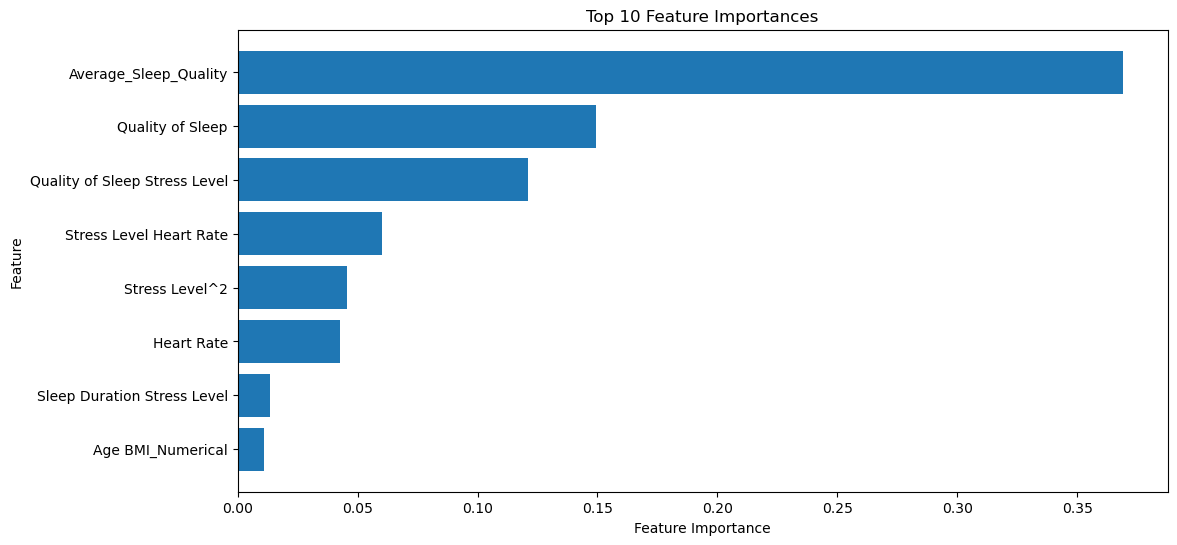

In [175]:
# Plot the Top features based on importance

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(top_features_names, top_features_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


## Hyperparameter Tuning

In [177]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Update model with best parameters
gbr_best = GradientBoostingRegressor(**best_params)
gbr_best.fit(X_train, y_train)


Best parameters found:  {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}


GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=200)

**Cross-Validation**

In [253]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(gbr_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Average CV score
mean_cv_score = -cv_scores.mean()
print("Average cross-validation MSE: ", mean_cv_score)


Average cross-validation MSE:  0.010138524744615848


**Feature Selection**

In [272]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', or 'constant'

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now apply the SelectFromModel and the rest of your steps
sfm.fit(X_train_imputed, y_train)
X_train_transformed = sfm.transform(X_train_imputed)
X_test_transformed = sfm.transform(X_test_imputed)

# Train the model again on the selected features
gbr_best.fit(X_train_transformed, y_train)
y_pred = gbr_best.predict(X_test_transformed)
